In [1]:
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.ticker as tick
import scipy.special as spec
import scipy.integrate as integrate
from jupyterthemes import jtplot

In [2]:
jtplot.reset()
mp.style.use("seaborn")
mp.rcParams["font.family"] = "serif"
mp.rcParams["text.usetex"] = True
mp.rcParams["figure.figsize"] = (5*16/9, 5)
mp.rcParams["figure.dpi"] = 100

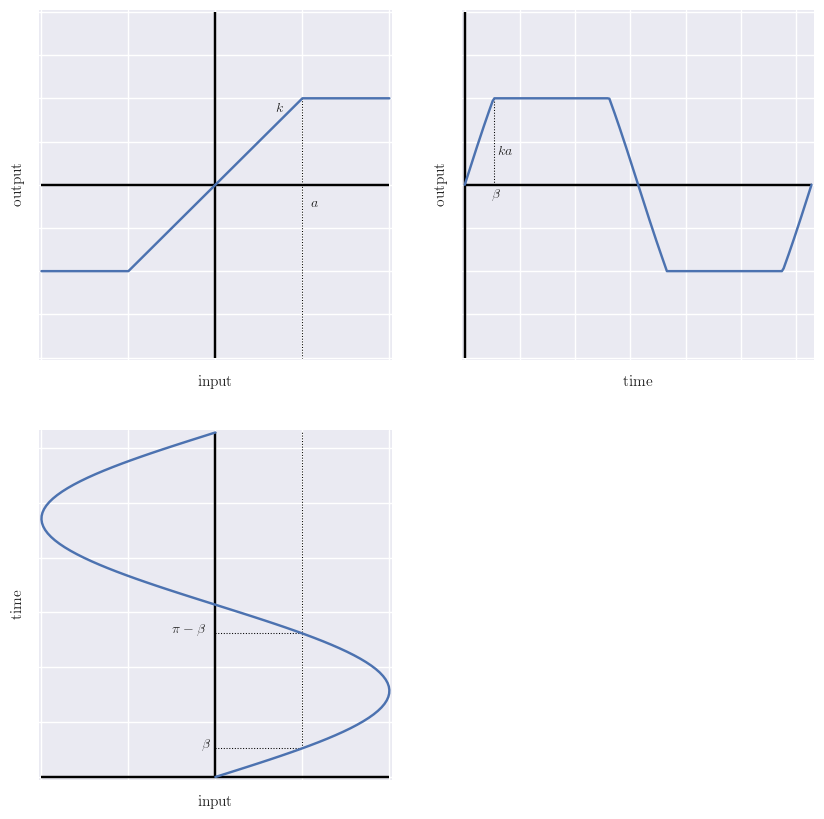

In [18]:
fig = mp.figure(figsize=(5*2, 5*2))

ax = fig.add_subplot(221)
xtf = np.concatenate((np.linspace(-4, -2, 50), np.linspace(-2, 2, 50), np.linspace(2, 4, 50)))
ytf = np.concatenate((np.ones(50)*-2, xtf[50:100], np.ones(50)*2))
ax.plot(xtf, ytf)
ax.set_xlabel("input")
ax.set_ylabel("output")
ax.text(1.4, 1.7, "$k$")
ax.text(2.2, -0.5, "$a$")
ax.vlines(2, 2, -4, linestyle=":", linewidth=0.75)
ax.hlines(0, xtf.min(), xtf.max())
ax.vlines(0, -4, 4)
ax.set_xlim(-4.05, 4.05)
ax.set_ylim(-4.05, 4.05)
ax.xaxis.set_major_formatter(tick.NullFormatter())
ax.yaxis.set_major_formatter(tick.NullFormatter())

ax = fig.add_subplot(222)
xout = np.linspace(0, 2*np.pi, 200)
yout = 4*np.sin(xout)
yout[17:83] = 2
yout[116:183] = -2
ax.plot(xout, yout)
ax.set_xlabel("time")
ax.set_ylabel("output")
ax.text(0.5, -0.3, r"$\beta$")
ax.text(0.6, 0.7, "$ka$")
ax.vlines(xout[17], 0, yout.max(), linestyle=":", linewidth=0.75)
ax.hlines(0, xout.min(), xout.max())
ax.vlines(0, -4, 4)
ax.set_ylim(-4.05, 4.05)
ax.set_xlim(-0.05, 2*np.pi+0.05)
ax.xaxis.set_major_formatter(tick.NullFormatter())
ax.yaxis.set_major_formatter(tick.NullFormatter())

ax = fig.add_subplot(223)
yin = np.linspace(0, 2*np.pi, 100)
xin = 4*np.sin(yin)
ax.plot(xin, yin)
ax.set_xlabel("input")
ax.set_ylabel("time")
ax.vlines(2, xout[17], 2*np.pi, linestyle=":", linewidth=0.75)
ax.hlines(xout[17], 0, yout[17], linestyle=":", linewidth=0.75)
ax.hlines(xout[83], 0, yout[83], linestyle=":", linewidth=0.75)
ax.text(-0.3, xout[17], r"$\beta$")
ax.text(-1, xout[83], r"$\pi - \beta$")
ax.hlines(0, xin.min(), xin.max())
ax.vlines(0, yin.min(), yin.max())
ax.set_xlim(-4.05, 4.05)
ax.set_ylim(-0.05, 2*np.pi + 0.05)
ax.xaxis.set_major_formatter(tick.NullFormatter())
ax.yaxis.set_major_formatter(tick.NullFormatter())

mp.savefig("iocurve.png", dpi=300, bbox_inches="tight")
mp.show()

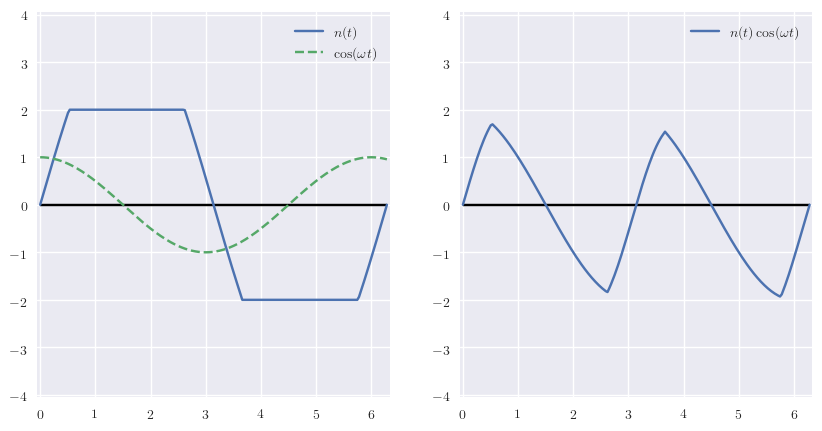

In [19]:
fig = mp.figure(figsize=(5*2, 5))

ax = fig.add_subplot(121)
ax.plot(xout, yout, label=r"$n(t)$")
ax.hlines(0, xout.min(), xout.max())
ax.set_ylim(-4.05, 4.05)
ax.set_xlim(-0.05, 2*np.pi + 0.05)
x = np.linspace(0, 2*np.pi, 200)
y = np.cos(2*np.pi*1/6*x)
ax.plot(x, y, "--", label=r"$\cos(\omega t)$")
ax.legend()

ax = fig.add_subplot(122)
ax.plot(x, yout*y, label=r"$n(t)\cos(\omega t)$")
ax.hlines(0, xout.min(), xout.max())
ax.set_ylim(-4.05, 4.05)
ax.set_xlim(-0.05, 2*np.pi + 0.05)
ax.legend()

mp.savefig("prod-ncos.png", dpi=300, bbox_inches="tight")
mp.show()

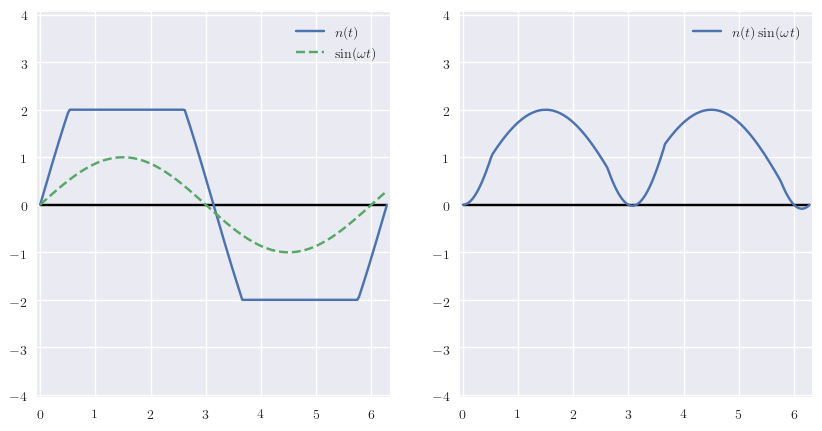

In [21]:
fig = mp.figure(figsize=(5*2, 5))

ax = fig.add_subplot(121)
ax.plot(xout, yout, label=r"$n(t)$")
ax.hlines(0, xout.min(), xout.max())
ax.set_ylim(-4.05, 4.05)
ax.set_xlim(-0.05, 2*np.pi + 0.05)
x = np.linspace(0, 2*np.pi, 200)
y = np.sin(2*np.pi*1/6*x)
ax.plot(x, y, "--", label=r"$\sin(\omega t)$")
ax.legend()

ax = fig.add_subplot(122)
ax.plot(x, yout*y, label=r"$n(t)\sin(\omega t)$")
ax.hlines(0, xout.min(), xout.max())
ax.set_ylim(-4.05, 4.05)
ax.set_xlim(-0.05, 2*np.pi + 0.05)
ax.legend()

mp.savefig("prod-nsin.png", dpi=300, bbox_inches="tight")
mp.show()

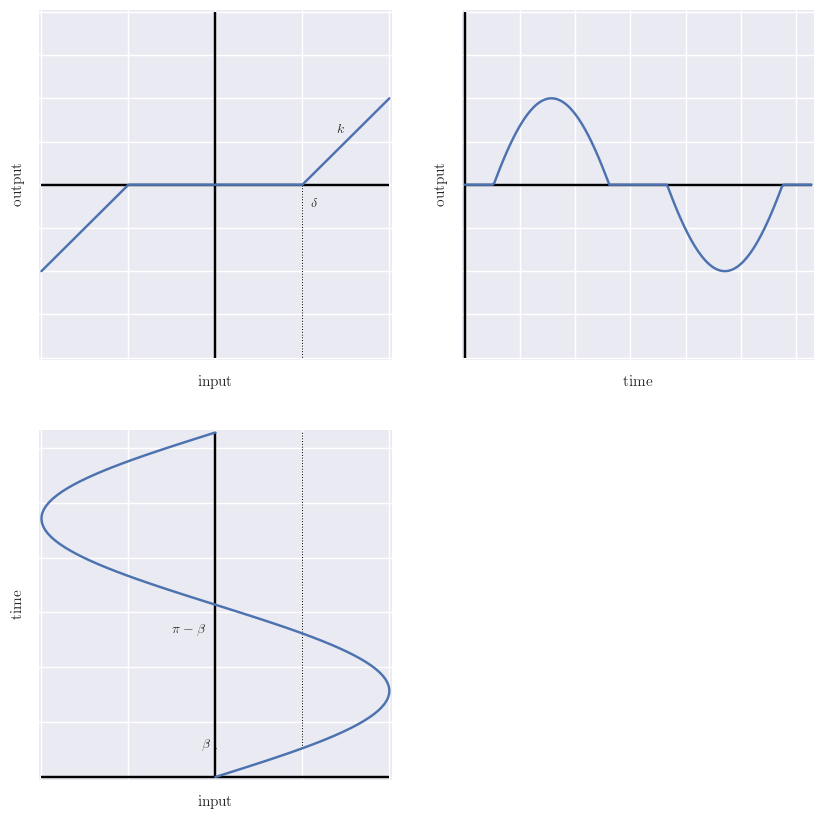

In [27]:
fig = mp.figure(figsize=(5*2, 5*2))

ax = fig.add_subplot(221)
xtf = np.concatenate((np.linspace(-4, -2, 50), np.linspace(-2, 2, 50), np.linspace(2, 4, 50)))
ytf = np.concatenate((xtf[:50]+2, np.zeros(50), xtf[100:]-2))
ax.plot(xtf, ytf)
ax.set_xlabel("input")
ax.set_ylabel("output")
ax.text(2.8, 1.2, "$k$")
ax.text(2.2, -0.5, r"$\delta$")
ax.vlines(2, 0, -4, linestyle=":", linewidth=0.75)
ax.hlines(0, xtf.min(), xtf.max())
ax.vlines(0, xin.min(), xin.max())
ax.set_ylim(xin.min(), xin.max())
ax.set_xlim(-4.05, 4.05)
ax.set_ylim(-4.05, 4.05)
ax.xaxis.set_major_formatter(tick.NullFormatter())
ax.yaxis.set_major_formatter(tick.NullFormatter())

ax = fig.add_subplot(222)
xout = np.linspace(0, 2*np.pi, 200)
yout = 4*np.sin(xout)
pidx = 83+17
yout[:17] = 0
yout[83:pidx+17] = 0
yout[2*pidx-17:] = 0
for i in range(0, len(yout)//2):
    if yout[i] != 0:
        yout[i] -= 2
for i in range(len(yout)//2, len(yout)):
    if yout[i] != 0:
        yout[i] += 2
ax.plot(xout, yout)
ax.set_xlabel("time")
ax.set_ylabel("output")
ax.hlines(0, xout.min(), xout.max())
ax.vlines(0, -4, 4)
ax.set_ylim(-4.05, 4.05)
ax.set_xlim(-0.05, 2*np.pi+0.05)
ax.xaxis.set_major_formatter(tick.NullFormatter())
ax.yaxis.set_major_formatter(tick.NullFormatter())

ax = fig.add_subplot(223)
yin = np.linspace(0, 2*np.pi, 100)
xin = 4*np.sin(yin)
ax.plot(xin, yin)
ax.set_xlabel("input")
ax.set_ylabel("time")
ax.vlines(2, xout[17], 2*np.pi, linestyle=":", linewidth=0.75)
ax.hlines(xout[17], 0, yout[17], linestyle=":", linewidth=0.75)
ax.hlines(xout[83], 0, yout[83], linestyle=":", linewidth=0.75)
ax.text(-0.3, xout[17], r"$\beta$")
ax.text(-1, xout[83], r"$\pi - \beta$")
ax.hlines(0, xin.min(), xin.max())
ax.vlines(0, yin.min(), yin.max())
ax.set_xlim(-4.05, 4.05)
ax.set_ylim(-0.05, 2*np.pi + 0.05)
ax.xaxis.set_major_formatter(tick.NullFormatter())
ax.yaxis.set_major_formatter(tick.NullFormatter())

mp.savefig("iocurve_dead.png", dpi=300, bbox_inches="tight")
mp.show()

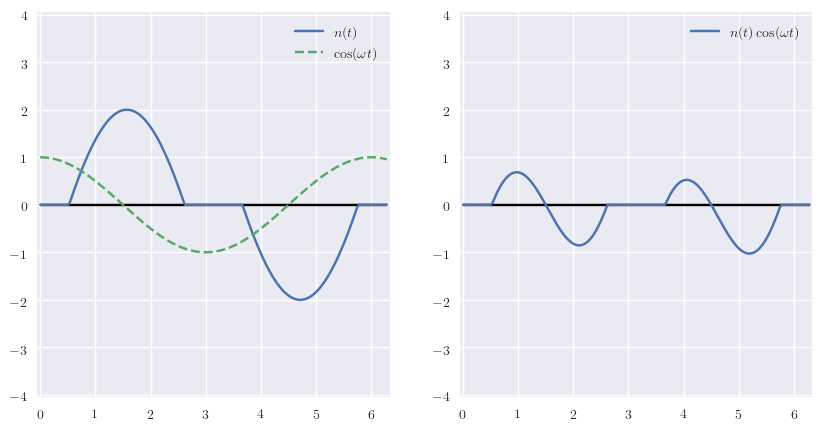

In [23]:
fig = mp.figure(figsize=(5*2, 5))

ax = fig.add_subplot(121)
ax.plot(xout, yout, label=r"$n(t)$")
ax.hlines(0, xout.min(), xout.max())
ax.set_ylim(-4.05, 4.05)
ax.set_xlim(-0.05, 2*np.pi + 0.05)
x = np.linspace(0, 2*np.pi, 200)
y = np.cos(2*np.pi*1/6*x)
ax.plot(x, y, "--", label=r"$\cos(\omega t)$")
ax.legend()

ax = fig.add_subplot(122)
ax.plot(x, yout*y, label=r"$n(t)\cos(\omega t)$")
ax.hlines(0, xout.min(), xout.max())
ax.set_ylim(-4.05, 4.05)
ax.set_xlim(-0.05, 2*np.pi + 0.05)
ax.legend()

mp.savefig("deadprod-ncos.png", dpi=300, bbox_inches="tight")
mp.show()

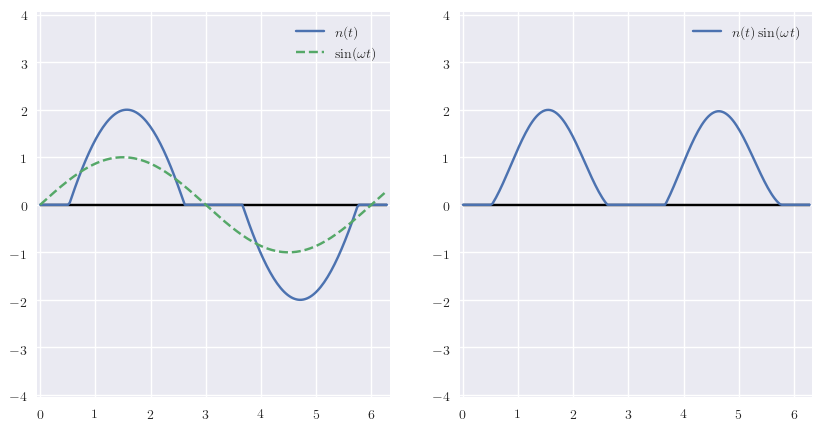

In [24]:
fig = mp.figure(figsize=(5*2, 5))

ax = fig.add_subplot(121)
ax.plot(xout, yout, label=r"$n(t)$")
ax.hlines(0, xout.min(), xout.max())
ax.set_ylim(-4.05, 4.05)
ax.set_xlim(-0.05, 2*np.pi + 0.05)
x = np.linspace(0, 2*np.pi, 200)
y = np.sin(2*np.pi*1/6*x)
ax.plot(x, y, "--", label=r"$\sin(\omega t)$")
ax.legend()

ax = fig.add_subplot(122)
ax.plot(x, yout*y, label=r"$n(t)\sin(\omega t)$")
ax.hlines(0, xout.min(), xout.max())
ax.set_ylim(-4.05, 4.05)
ax.set_xlim(-0.05, 2*np.pi + 0.05)
ax.legend()

mp.savefig("deadprod-nsin.png", dpi=300, bbox_inches="tight")
mp.show()